SciPy

    Image operations
    MATLAB files
    Distance between points
    
Matplotlib

    Plotting
    Subplots

Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

## Image operations

Previously SciPy provided some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. 

Now it is depressed. Instead, imaeio and skimage provide image operations functions. Here is a simple example that showcases these functions:

### Images
You can use the imshow function to show images. Here is an example:

In [1]:
import numpy as np
# from scipy.misc import imread, imresize
import imageio
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt



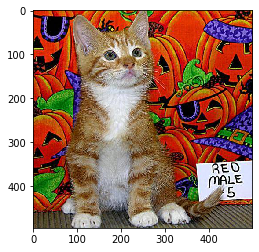

In [5]:
# Read an JPEG image into a numpy array
path = './'
img = imageio.imread(path+'cat.5665.jpg')

# Show the original image
plt.imshow(img)

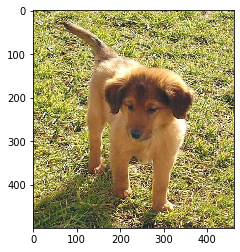

In [3]:
# Read an JPEG image into a numpy array
path = './'
img = imageio.imread(path+'dog.9452.jpg')

# Show the original image
plt.imshow(img)



In [4]:
# type of the image and size
print(img.dtype, img.shape)  

uint8 (500, 461, 3)


We can tint the image by scaling each of the color channels by a different scalar constant. 

The image has shape (400, 248, 3).

we multiply it by the array [1, 0.95, 0.9] of shape (3,).

numpy broadcasting means that this leaves the red channel unchanged,and multiplies the green and blue channels by 0.95 and 0.9
respectively.

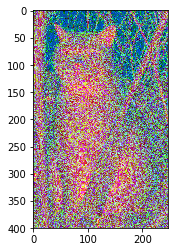

In [10]:
img_tinted = img * [1, 0.95, 0.9]

# Show the tinted image
plt.imshow(img_tinted)

A slight gotcha with imshow is that it might give strange results if presented with data that is not uint8. To work around this, we explicitly cast the image to uint8 before displaying it.

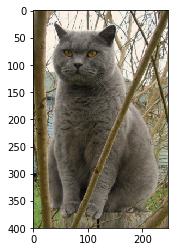

In [11]:
plt.imshow(np.uint8(img_tinted))
#plt.show()

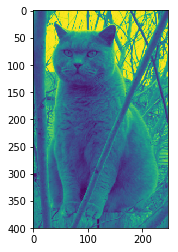

In [6]:
img_tinted1 = img.dot([1, 0.95, 0.9])

# Show the tinted image
plt.imshow(img_tinted1)

Show the two images together for comparision.

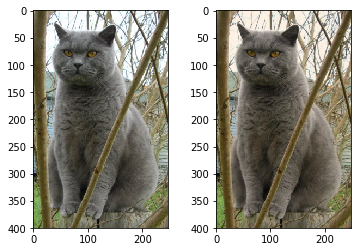

In [12]:
# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)
plt.imshow(np.uint8(img_tinted))

Write (save) the image to a disk.

In [13]:
# Write the tinted image back to disk
imageio.imwrite(path+'cat_tinted_1.jpg', img_tinted)





C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 255.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [15]:
# Resize the tinted image to be 300 by 300 pixels.
img_tinted1 = resize(img_tinted, (300, 300))
imageio.imwrite(path+'cat_tinted_2.jpg', img_tinted1)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float64 to uint8, range [0.0, 255.0]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


## Distance between points
SciPy defines some useful functions for computing distances between sets of points.

The function scipy.spatial.distance.pdist computes the distance between all pairs of points in a given set:

In [16]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


A similar function (scipy.spatial.distance.cdist) computes the distance between all pairs across two sets of points;

## Matplotlib
Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.

### Plotting
The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

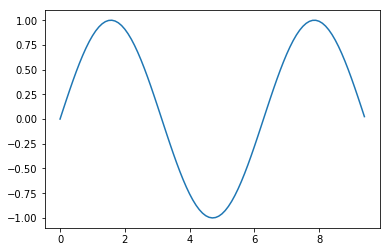

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

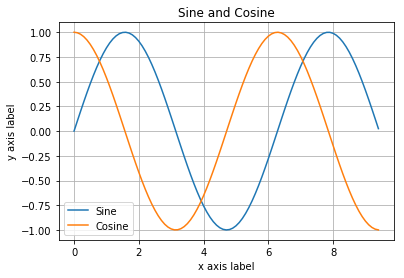

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.grid()
plt.show()


### Subplots
You can plot different things in the same figure using the subplot function. Here is an example:

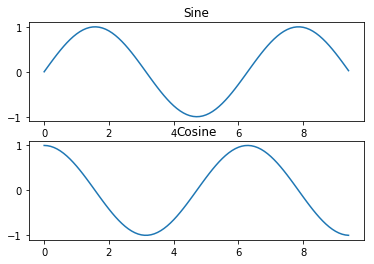

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()